<a href="https://colab.research.google.com/github/alialthiab/Data-Science/blob/Machine-Learning/Heart_Disease_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#heart_df=pd.read_csv("/content/heart.csv")
from google.colab import drive

drive.mount('/content/mydrive')



Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [5]:
heart_df=pd.read_csv("/content/mydrive/MyDrive/Data sets/heart.csv")

# Data Exploration

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
s = (heart_df.dtypes==object)
object_cols = list(s[s].index)
object_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
heart_df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
heart_df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
heart_df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
heart_df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

# Data Visualization

In [ ]:
group_by_sex=heart_df.groupby('Sex').mean()
group_by_sex

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
M,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724


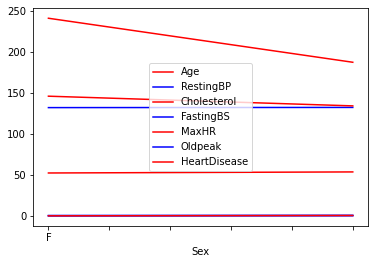

In [ ]:
group_by_sex.plot(color=['red'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af154efd0>,
      dtype=object)

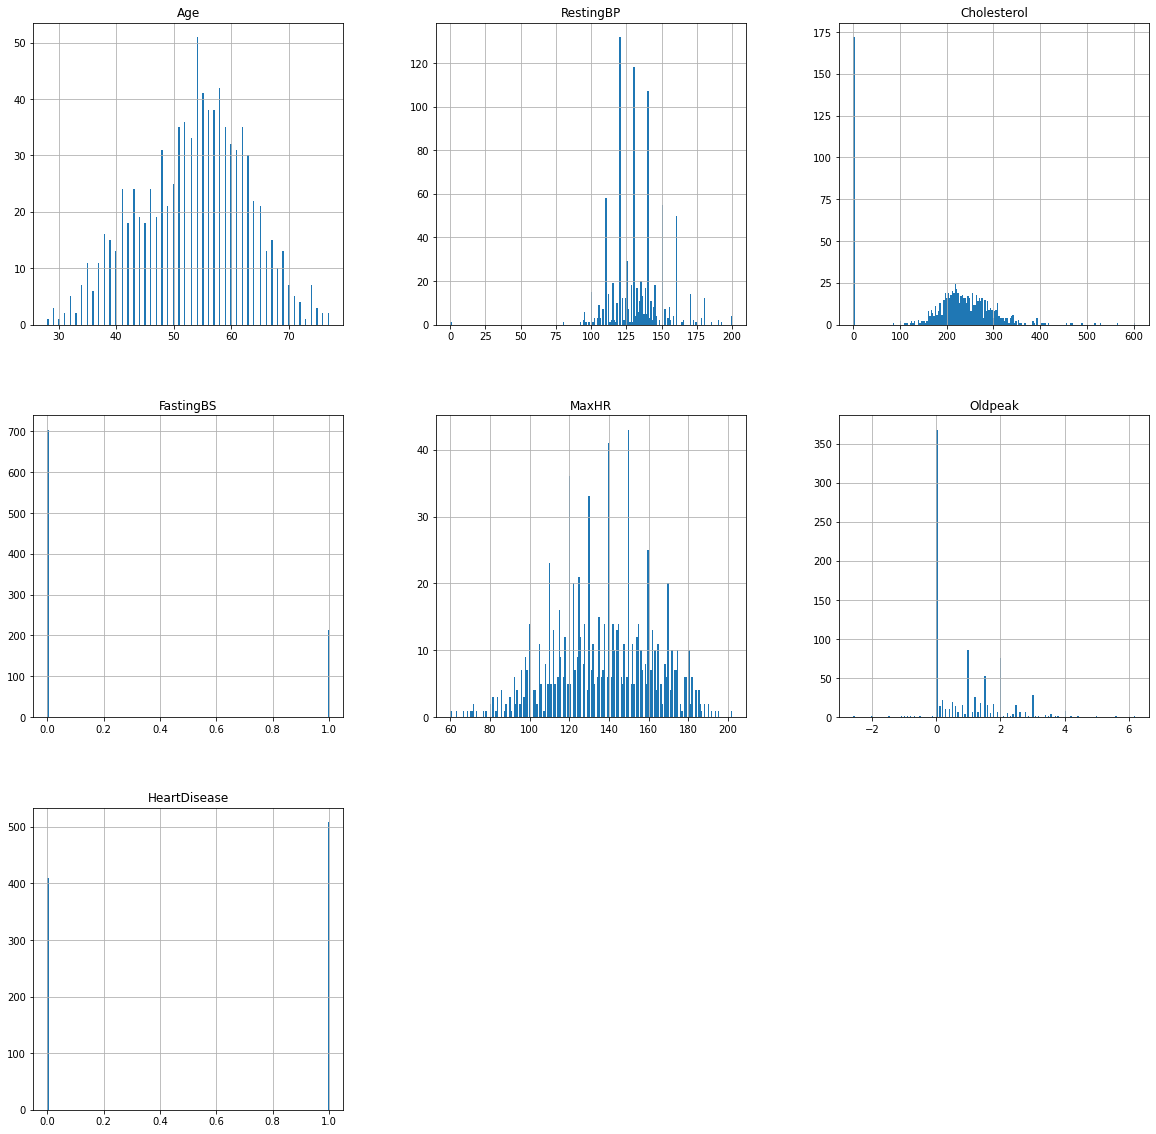

In [ ]:
heart_df.hist(figsize = (20,20),bins=200)

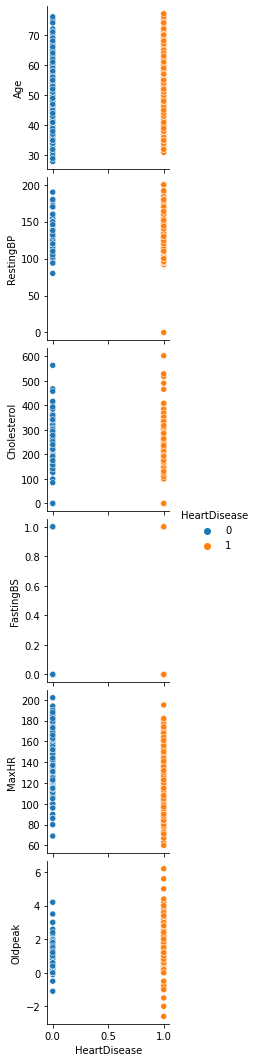

In [11]:
cols = heart_df.columns
sns.pairplot(
    heart_df,
    y_vars = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS'
       , 'MaxHR', 'Oldpeak', ],
    x_vars = ["HeartDisease"],
    hue="HeartDisease"
             )

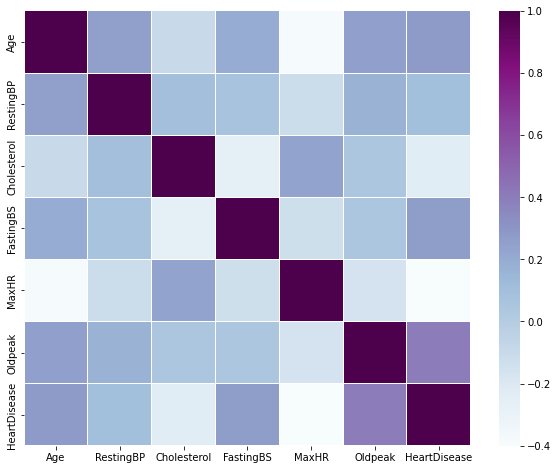

In [13]:
heart_df_Corr=heart_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(heart_df_Corr,cmap="BuPu",linewidths=0.005)


In [18]:
heart_df_Corr['HeartDisease'].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

# Data Preparation

## Categorical Data

In [20]:
heart_df1 = heart_df.copy()

In [21]:
heart_df1.Sex.unique()

array(['M', 'F'], dtype=object)

In [22]:
object_cols

NameError: ignored

In [23]:
heart_df1.ChestPainType.replace({'ATA':2, 'NAP':3, 'ASY':0, 'TA':1}, inplace=True)
heart_df1.Sex.replace({'F':0, 'M':1}, inplace=True)
heart_df1.ExerciseAngina.replace({'N':0, 'Y':1}, inplace=True)
heart_df1.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':2}, inplace=True)
heart_df1.ST_Slope.replace({'Flat':0, 'Up':1, 'Down':-1}, inplace=True)

In [24]:
heart_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [25]:
heart_df_Corr=heart_df1.corr()
heart_df_Corr['HeartDisease'].sort_values()

ST_Slope         -0.558771
ChestPainType    -0.466847
MaxHR            -0.400421
Cholesterol      -0.232741
RestingECG        0.061011
RestingBP         0.107589
FastingBS         0.267291
Age               0.282039
Sex               0.305445
Oldpeak           0.403951
ExerciseAngina    0.494282
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

## Outliers

In [26]:
from scipy import stats
import numpy as np
heart_df2=heart_df1[(np.abs(stats.zscore(heart_df1))<3).all(axis=1)]
heart_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    int64  
 1   Sex             899 non-null    int64  
 2   ChestPainType   899 non-null    int64  
 3   RestingBP       899 non-null    int64  
 4   Cholesterol     899 non-null    int64  
 5   FastingBS       899 non-null    int64  
 6   RestingECG      899 non-null    int64  
 7   MaxHR           899 non-null    int64  
 8   ExerciseAngina  899 non-null    int64  
 9   Oldpeak         899 non-null    float64
 10  ST_Slope        899 non-null    int64  
 11  HeartDisease    899 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 91.3 KB


In [27]:
heart_df2.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,0,140,207,0,0,130,1,1.5,0,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


## Features Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaledData = MinMaxScaler()

heart_df3 = pd.DataFrame(scaledData.fit_transform(heart_df2),columns=heart_df2.columns,index=heart_df2.index)
heart_df3.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,0.520351,0.789766,0.365962,0.495503,0.382250,0.232481,0.299221,0.531782,0.403782,0.476919,0.686874,0.547275
std,0.192981,0.407701,0.422895,0.163056,0.206868,0.422649,0.401846,0.182423,0.490928,0.167938,0.300529,0.498037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.380952,0.336873,0.000000,0.000000,0.410072,0.000000,0.333333,0.500000,0.000000
50%,0.530612,1.000000,0.000000,0.476190,0.428571,0.000000,0.000000,0.539568,0.000000,0.416667,0.500000,1.000000
75%,0.653061,1.000000,0.666667,0.571429,0.513514,0.000000,0.500000,0.669065,1.000000,0.583333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
heart_df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.666667,0.571429,0.557915,0.0,0.0,0.784173,0.0,0.333333,1.0,0.0
1,0.428571,0.0,1.000000,0.761905,0.347490,0.0,0.0,0.669065,0.0,0.500000,0.5,1.0
2,0.183673,1.0,0.666667,0.476190,0.546332,0.0,0.5,0.251799,0.0,0.333333,1.0,0.0
3,0.408163,0.0,0.000000,0.552381,0.413127,0.0,0.0,0.323741,1.0,0.583333,0.5,1.0
4,0.530612,1.0,1.000000,0.666667,0.376448,0.0,0.0,0.424460,0.0,0.333333,1.0,0.0


# Model Selection and Training

## Data split

In [36]:
from sklearn.model_selection import train_test_split
X = heart_df3.copy()
y = heart_df3.HeartDisease.copy()
X.drop(['HeartDisease'], axis=1, inplace=True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

## Training Models

### Logistic Regression

Training

In [41]:
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression()

LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression()

Prediction

In [45]:
X_prediction_LR = LogisticRegressionModel.predict(X_valid)
X_prediction_LR.shape

(180,)

Validation

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

LogisticRegressionMAE = mean_absolute_error(y_valid, X_prediction_LR)
print("MAE:", str(LogisticRegressionMAE))

LogisticRegressionMSE = np.sqrt(mean_squared_error(y_valid, X_prediction_LR))
print("MSE:", str(LogisticRegressionMSE))


MAE: 0.12777777777777777
MSE: 0.35746017649212025


### Decision Tree

Training

In [48]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier()

Prediction

In [50]:
X_prediction_DT = DecisionTreeClassifierModel.predict(X_valid)
X_prediction_DT.shape

(180,)

Validation

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

DecisionTreeClassifierMAE = mean_absolute_error(y_valid, X_prediction_DT)
print("MAE:", str(DecisionTreeClassifierMAE))

DecisionTreeClassifiernMSE = np.sqrt(mean_squared_error(y_valid, X_prediction_DT))
print("MSE:", str(DecisionTreeClassifiernMSE))

MAE: 0.2
MSE: 0.4472135954999579


### Random Forest

Training

In [52]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier()
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier()

Prediction

In [54]:
X_prediction_RF = RandomForestClassifierModel.predict(X_valid)

Validation

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

RandomForestClassifierMAE = mean_absolute_error(y_valid, X_prediction_RF)
print("MAE:", str(RandomForestClassifierMAE))

RandomForestClassifierMSE = np.sqrt(mean_squared_error(y_valid, X_prediction_RF))
print("MSE:", str(RandomForestClassifierMSE))

MAE: 0.12777777777777777
MSE: 0.35746017649212025


### XGBoost

Training

In [59]:
from xgboost import XGBClassifier

XGBClassifierModel = XGBClassifier()

XGBClassifierModel.fit(X_train, y_train)

XGBClassifier()

Prediction

In [60]:
X_prediction_XGB = XGBClassifierModel.predict(X_valid)


Validation

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

XGBClassifierMAE = mean_absolute_error(y_valid, X_prediction_XGB)
print("MAE:", str(XGBClassifierMAE))

XGBClassifierMSE = np.sqrt(mean_squared_error(y_valid, X_prediction_XGB))
print("MSE:", str(XGBClassifierMSE))

MAE: 0.12222222222222222
MSE: 0.3496029493900505


### SGDClassifier

Training

In [62]:
from sklearn.linear_model import SGDClassifier
SGDClassifierModel = SGDClassifier()
SGDClassifierModel.fit(X_train, y_train)

SGDClassifier()

Prediction

In [64]:
X_prediction_SGD = SGDClassifierModel.predict(X_valid)

Validation

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

SGDClassifierMAE = mean_absolute_error(y_valid, X_prediction_SGD)
print("MAE:", str(SGDClassifierMAE))

SGDClassifierMSE = np.sqrt(mean_squared_error(y_valid, X_prediction_SGD))
print("MSE:", str(SGDClassifierMAE))

MAE: 0.15
MSE: 0.15


## Performance Measure

we've noticed the best model was Random Forest withe the deffault hyper paramaters, so we'll discuss the performance measure based on.

###  Measuring Accuracy Using Cross-validation

In [78]:
cross_val_score(RandomForestClassifierModel, X_train, y_train, cv=5, scoring="accuracy")

array([0.86111111, 0.89583333, 0.86111111, 0.86111111, 0.87412587])

In [76]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(RandomForestClassifierModel, X_train, y_train, cv=5, scoring="accuracy").mean()

0.8692793317793317

In [77]:
cross_val_score(LogisticRegressionModel, X_train, y_train, cv=5, scoring="accuracy").mean()

0.8455905205905205

In [79]:
cross_val_score(DecisionTreeClassifierModel, X_train, y_train, cv=5, scoring="accuracy").mean()

0.7816336441336442

In [80]:
cross_val_score(XGBClassifierModel, X_train, y_train, cv=5, scoring="accuracy").mean()

0.8762140637140637

In [81]:
cross_val_score(SGDClassifierModel, X_train, y_train, cv=5, scoring="accuracy").mean()

0.8205613830613832

*we'll neglect DT model, SGDC model, and LR model.*

###Confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix,f1_score, roc_curve, precision_score, recall_score

In [92]:
prediction1 = cross_val_predict(RandomForestClassifierModel, X_train, y_train, cv=5)
confusion_matrix(y_train, prediction1)

array([[260,  58],
       [ 40, 361]])

In [94]:
prediction2 = cross_val_predict(XGBClassifierModel, X_train, y_train, cv=5)
confusion_matrix(y_train, prediction2)

array([[264,  54],
       [ 35, 366]])

#### Precision & Recall

for RF:

In [97]:
precision_score(y_train, prediction1)

0.8615751789976134

In [98]:
recall_score(y_train, prediction1)

0.9002493765586035

In [100]:
f1_score(y_train, prediction1)

0.8804878048780488

for XGBC:

In [101]:
precision_score(y_train, prediction2)

0.8714285714285714

In [102]:
recall_score(y_train, prediction2)

0.912718204488778

In [103]:
f1_score(y_train, prediction2)

0.8915956151035324